In [1]:
import os
import sqlite3

import matplotlib.pyplot as plt
import nfts.dataset

import pandas as pd

from nft_analysis_functions import range_analysis

In [2]:
dirname = os.path.dirname(os.path.abspath("__file__"))
DATASET_PATH = os.path.join(dirname, 'nfts.sqlite')
ds = nfts.dataset.FromSQLite(DATASET_PATH)

# load current owners dataframe
current_owners_df = ds.load_dataframe("current_owners")

# Ownership Distribution
This Section will cover how NFTs are distributed among different owners, analyzing in particular addresses that owns multiple tokens

In [3]:
current_owners_df.head()

,nft_address,token_id,owner
0,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,0,0xb776cAb26B9e6Be821842DC0cc0e8217489a4581
1,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,1,0x8A73024B39A4477a5Dc43fD6360e446851AD1D28
2,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,10,0x5e5C817E9264B46cBBB980198684Ad9d14f3e0B4
3,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,11,0x8376f63c13b99D3eedfA51ddd77Ff375279B3Ba0
4,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,12,0xb5e34552F32BA9226C987769BF6555a538510BA8


In [5]:
tokens_per_owner_df = current_owners_df.groupby('owner', as_index=False).size().rename(columns={'size':'num_tokens'})
tokens_per_owner_df.sort_values('num_tokens', ascending=False, inplace=True)
tokens_per_owner_df.head()

,owner,num_tokens
7272,0x02E4103b8A3c55AcDDF298311a9928f9Fe27822C,100045
0,0x0000000000000000000000000000000000000000,83548
470227,0xE052113bd7D7700d623414a0a4585BCaE754E9d5,51028
562045,0xcDA72070E455bb31C7690a170224Ce43623d0B6f,50131
369228,0x96bEE49d3386d674bF4E956D9B3ce61b9540409D,36751


In [5]:
ownership_distribution_list = []

# all owners
ownership_distribution_list.append(range_analysis(tokens_per_owner_df, 1))

for i in [1, 2, 5, 10, 100, 1000]:
    ownership_distribution_list.append(range_analysis(tokens_per_owner_df, 1, i))

# owners with more than 1 token
ownership_distribution_list.append(range_analysis(tokens_per_owner_df, 2))

ownership_distribution_df = pd.DataFrame(ownership_distribution_list, columns=['NFTs owned', 'number of owners', '% of owners', 'tokens owned', '% of tokens owned'])
ownership_distribution_df

,NFTs owned,number of owners,% of owners,tokens owned,% of tokens owned
0,1 <= n,625354,100.0%,7020950,100.0%
1,n = 1,259806,41.55%,259806,3.7%
2,1 <= n <= 2,348948,55.8%,438090,6.24%
3,1 <= n <= 5,456399,72.98%,842892,12.01%
4,1 <= n <= 10,520834,83.29%,1335177,19.02%
5,1 <= n <= 100,615658,98.45%,4036089,57.49%
6,1 <= n <= 1000,625107,99.96%,6112780,87.06%
7,2 <= n,365548,58.45%,6761144,96.3%


## Top Owners

In [6]:
top_owners_df = tokens_per_owner_df.sort_values("num_tokens", inplace=False, ascending=False)

top_owners_df.head(20)

,owner,num_tokens
7272,0x02E4103b8A3c55AcDDF298311a9928f9Fe27822C,100045
0,0x0000000000000000000000000000000000000000,83548
470227,0xE052113bd7D7700d623414a0a4585BCaE754E9d5,51028
562045,0xcDA72070E455bb31C7690a170224Ce43623d0B6f,50131
369228,0x96bEE49d3386d674bF4E956D9B3ce61b9540409D,36751
439086,0xC69b4c6fFDBaF843A0d0588c99E3C67f27069BEa,32905
427270,0xBa0d01220a7CeA942596123102535F800f558763,32691
7,0x000000000000000000000000000000000000dEaD,19758
277,0x0008d343091EF8BD3EFA730F6aAE5A26a285C7a2,12137
454705,0xD387A6E4e84a6C86bd90C158C6028A58CC8Ac459,11497


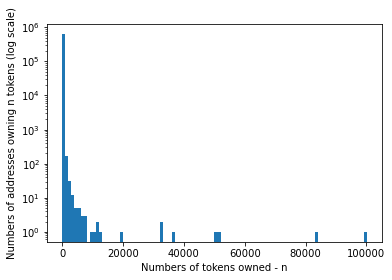

In [7]:
plt.xlabel('Numbers of tokens owned - n')
plt.ylabel('Numbers of addresses owning n tokens (log scale)')
_, _, _ = plt.hist(top_owners_df['num_tokens'], bins=100, log=True)

In [8]:
def top_owners_percentage (percentage, df):
    total_tokens = df['num_tokens'].sum()
    total_owners = len(df)

    num_top_owners = round(total_owners * percentage / 100) 
    top_df = df.head(num_top_owners)

    percentage_format = "{}%".format(percentage)
    num_tokens_owned = top_df['num_tokens'].sum()
    # percentage_tokens_owned = "{}%".format(round((num_tokens_owned / total_tokens) * 100, 2))
    percentage_tokens_owned = round((num_tokens_owned / total_tokens) * 100, 2)

    return [percentage, num_tokens_owned, percentage_tokens_owned]

In [9]:
top_owners_percentage_list = []
percentages = [1, 2.5, 5, 10, 16, 50]
for p in percentages:
    top_owners_percentage_list.append(top_owners_percentage(p, top_owners_df))

top_owners_percentage_df = pd.DataFrame(top_owners_percentage_list, columns=['% of top owners', 'tokens owned', '% of tokens owned'])
top_owners_percentage_df


,% of top owners,tokens owned,% of tokens owned
0,1.0,2581231,36.76
1,2.5,3475669,49.50
2,5.0,4261660,60.70
3,10.0,5091691,72.52
4,16.0,5636680,80.28
5,50.0,6655402,94.79


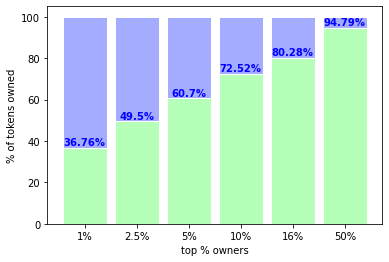

In [10]:
tokens_percentage_list = top_owners_percentage_df['% of tokens owned'].to_list()
percentages_format = ["{}%".format(i) for i in percentages]
tokens_percentage_difference = [100 - x for x in tokens_percentage_list]

# plot
barWidth = 0.85
# green Bars (representing % of tokens owned)
plt.bar(range(len(percentages)), tokens_percentage_list, color='#b5ffb9', edgecolor='white', width=barWidth)
# blue Bars (representing the remaining % of tokens)
plt.bar(range(len(percentages)), tokens_percentage_difference, bottom=tokens_percentage_list, color='#a3acff', edgecolor='white', width=barWidth)
 
for i in range(len(percentages)):
    plt.text(i, tokens_percentage_list[i]+1, ""+str(tokens_percentage_list[i])+"%", ha="center", color='blue', fontweight='bold')

plt.xticks(range(len(percentages)), percentages_format)
plt.xlabel("top % owners")
plt.ylabel("% of tokens owned")

# Show graphic
plt.show()

## Low Scale Owners

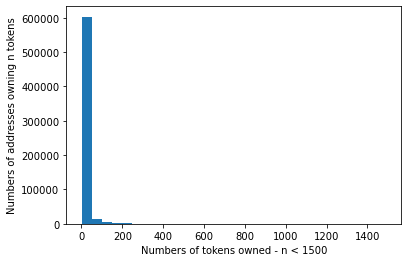

In [11]:
scale_cutoff = 1500
low_scale_owners = [num_tokens for num_tokens in top_owners_df['num_tokens'] 
                    if num_tokens<=scale_cutoff]

plt.xlabel(f'Numbers of tokens owned - n < {scale_cutoff}')
plt.ylabel('Numbers of addresses owning n tokens')
plt.hist(low_scale_owners, bins=int(scale_cutoff/50), log=False)
plt.show()

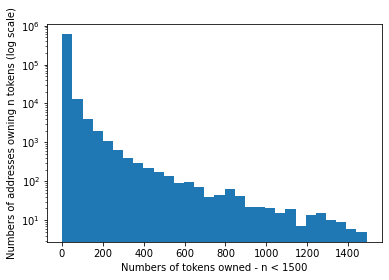

In [12]:
plt.xlabel(f'Numbers of tokens owned - n < {scale_cutoff}')
plt.ylabel('Numbers of addresses owning n tokens (log scale)')
plt.hist(low_scale_owners, bins=int(scale_cutoff/50), log=True)
plt.show()

# Conclusions

*write conclusions here . . .*